In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
data = pd.read_csv("newdata.csv")

In [5]:
print("Dataset Info:")
print(data.info())
print("\nMissing Values:\n", data.isnull().sum())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48120 entries, 0 to 48119
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  48120 non-null  int64 
 1   DateTime    48120 non-null  object
 2   Junction    48120 non-null  int64 
 3   Vehicles    48120 non-null  int64 
 4   ID          48120 non-null  int64 
 5   Year        48120 non-null  int64 
 6   Month       48120 non-null  int64 
 7   Day         48120 non-null  int64 
 8   Hour        48120 non-null  int64 
 9   DayOfWeek   48120 non-null  int64 
 10  DayName     48120 non-null  object
 11  WeekOfYear  48120 non-null  int64 
 12  Is_Weekend  48120 non-null  int64 
dtypes: int64(11), object(2)
memory usage: 4.8+ MB
None

Missing Values:
 Unnamed: 0    0
DateTime      0
Junction      0
Vehicles      0
ID            0
Year          0
Month         0
Day           0
Hour          0
DayOfWeek     0
DayName       0
WeekOfYear    0
Is_Weekend 

In [6]:
# Drop unnecessary columns (if any)
if 'Unnamed: 0' in data.columns:
    data = data.drop(columns=['Unnamed: 0'])

In [7]:
# Convert DateTime column to datetime format
data['DateTime'] = pd.to_datetime(data['DateTime'])

In [8]:
#Basic Data Understanding
print("\nDataset Summary:\n", data.describe())
print("\nUnique Junctions:", data['Junction'].unique())


Dataset Summary:
                             DateTime      Junction      Vehicles  \
count                          48120  48120.000000  48120.000000   
mean   2016-09-19 06:03:56.109725696      2.180549     22.791334   
min              2015-11-01 00:00:00      1.000000      1.000000   
25%              2016-04-16 01:45:00      1.000000      9.000000   
50%              2016-09-30 03:30:00      2.000000     15.000000   
75%              2017-02-25 16:00:00      3.000000     29.000000   
max              2017-06-30 23:00:00      4.000000    180.000000   
std                              NaN      0.966955     20.750063   

                 ID          Year         Month           Day          Hour  \
count  4.812000e+04  48120.000000  48120.000000  48120.000000  48120.000000   
mean   2.016330e+10   2016.269825      5.884289     15.700748     11.500000   
min    2.015110e+10   2015.000000      1.000000      1.000000      0.000000   
25%    2.016042e+10   2016.000000      3.000000     

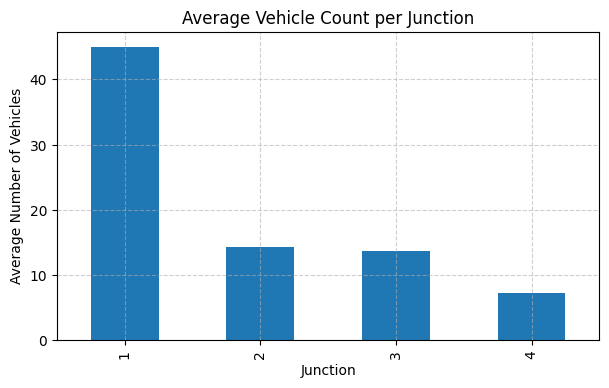

In [9]:
# Average vehicle count per Junction
avg_vehicles = data.groupby('Junction')['Vehicles'].mean()
avg_vehicles.plot(kind='bar', figsize=(7, 4))
plt.title("Average Vehicle Count per Junction")
plt.xlabel("Junction")
plt.ylabel("Average Number of Vehicles")
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

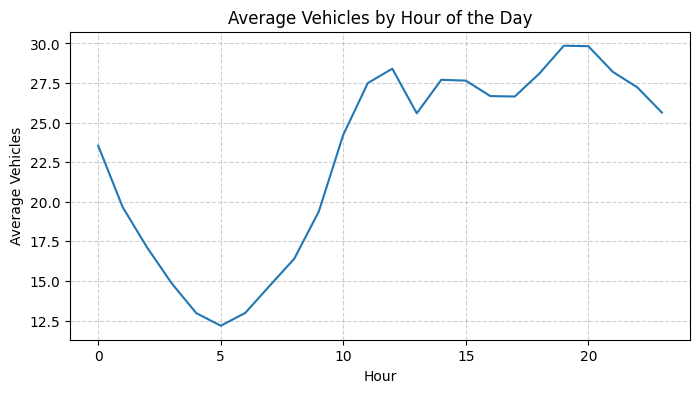

In [10]:
# Hourly traffic pattern
hourly_trend = data.groupby('Hour')['Vehicles'].mean()
plt.figure(figsize=(8, 4))
sns.lineplot(x=hourly_trend.index, y=hourly_trend.values)
plt.title("Average Vehicles by Hour of the Day")
plt.xlabel("Hour")
plt.ylabel("Average Vehicles")
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

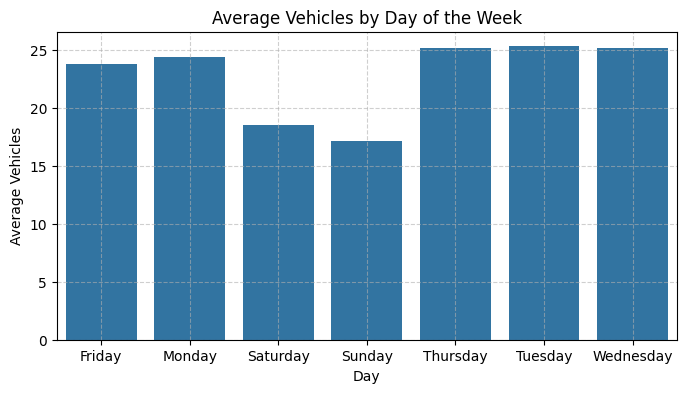

In [11]:
# Day-wise traffic pattern
daywise_trend = data.groupby('DayName')['Vehicles'].mean()
plt.figure(figsize=(8, 4))
sns.barplot(x=daywise_trend.index, y=daywise_trend.values)
plt.title("Average Vehicles by Day of the Week")
plt.xlabel("Day")
plt.ylabel("Average Vehicles")
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

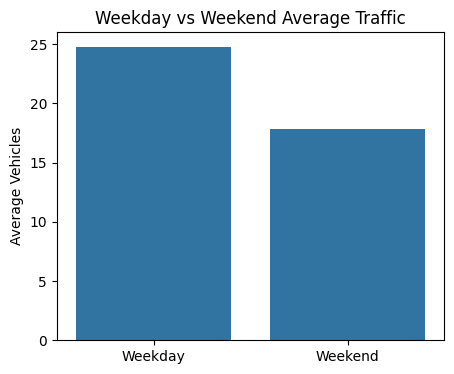

In [12]:
#Weekend vs Weekday Comparison
weekend_trend = data.groupby('Is_Weekend')['Vehicles'].mean()
labels = ['Weekday', 'Weekend']
plt.figure(figsize=(5, 4))
sns.barplot(x=labels, y=weekend_trend.values)
plt.title("Weekday vs Weekend Average Traffic")
plt.ylabel("Average Vehicles")
plt.show()

In [13]:
daily_data = data.groupby(['DateTime', 'Junction'])['Vehicles'].sum().reset_index()


In [14]:
daily_data

,DateTime,Junction,Vehicles
0,2015-11-01 00:00:00,1,15
1,2015-11-01 00:00:00,2,6
2,2015-11-01 00:00:00,3,9
3,2015-11-01 01:00:00,1,13
4,2015-11-01 01:00:00,2,6
...,...,...,...
48115,2017-06-30 22:00:00,4,22
48116,2017-06-30 23:00:00,1,78
48117,2017-06-30 23:00:00,2,27
48118,2017-06-30 23:00:00,3,39


<Axes: xlabel='Junction', ylabel='Vehicles'>

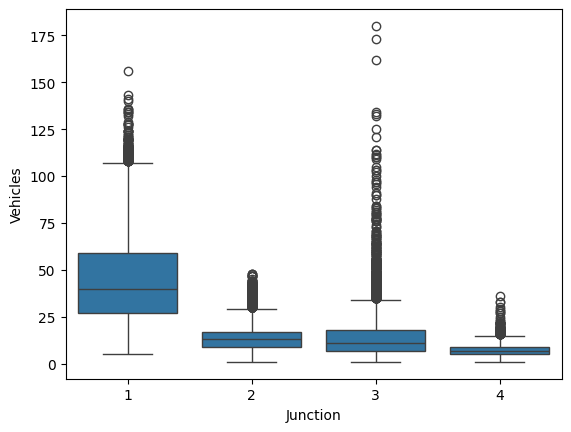

In [15]:
sns.boxplot(x='Junction', y='Vehicles', data=data)


ValueError: could not convert string to float: 'Sunday'

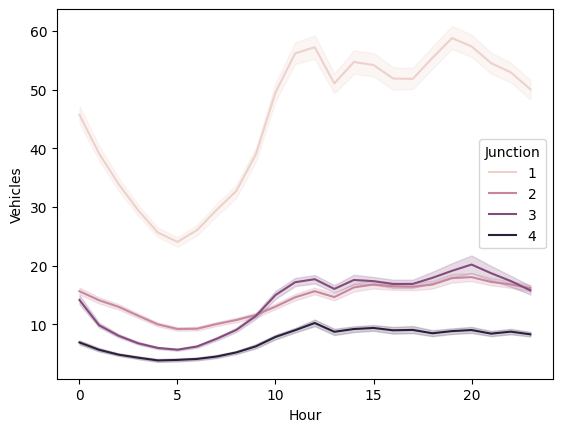

In [16]:
sns.lineplot(data=data, x='Hour', y='Vehicles', hue='Junction')
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')

In [ ]:
data['Traffic_Level'] = pd.cut(data['Vehicles'], bins=[0, 20, 50, 100], labels=['Low', 'Medium', 'High'])
data['Is_Peak_Hour'] = data['Hour'].apply(lambda x: 1 if x in [7,8,9,17,18,19] else 0)


In [17]:
data.head(10)

,DateTime,Junction,Vehicles,ID,Year,Month,Day,Hour,DayOfWeek,DayName,WeekOfYear,Is_Weekend
0,2015-11-01 00:00:00,1,15,20151101001,2015,11,1,0,6,Sunday,44,1
1,2015-11-01 01:00:00,1,13,20151101011,2015,11,1,1,6,Sunday,44,1
2,2015-11-01 02:00:00,1,10,20151101021,2015,11,1,2,6,Sunday,44,1
3,2015-11-01 03:00:00,1,7,20151101031,2015,11,1,3,6,Sunday,44,1
4,2015-11-01 04:00:00,1,9,20151101041,2015,11,1,4,6,Sunday,44,1
5,2015-11-01 05:00:00,1,6,20151101051,2015,11,1,5,6,Sunday,44,1
6,2015-11-01 06:00:00,1,9,20151101061,2015,11,1,6,6,Sunday,44,1
7,2015-11-01 07:00:00,1,8,20151101071,2015,11,1,7,6,Sunday,44,1
8,2015-11-01 08:00:00,1,11,20151101081,2015,11,1,8,6,Sunday,44,1
9,2015-11-01 09:00:00,1,12,20151101091,2015,11,1,9,6,Sunday,44,1


In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

In [19]:
X = data[['Hour', 'DayOfWeek', 'Is_Weekend', 'Junction']]
y = data['Vehicles']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [20]:
y_pred = model.predict(X_test)
print("R² Score:", r2_score(y_test, y_pred))
print("RMSE:", mean_squared_error(y_test, y_pred, squared=False))

R² Score: 0.44867665953518354
RMSE: 14.989664181171879


C:\Users\abhij\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [21]:
import warnings
warnings.filterwarnings('ignore') 

In [22]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

print("R² Score:", r2_score(y_test, y_pred))
print("RMSE:", mean_squared_error(y_test, y_pred, squared=False))


R² Score: 0.6786786521077084
RMSE: 11.443490249559709


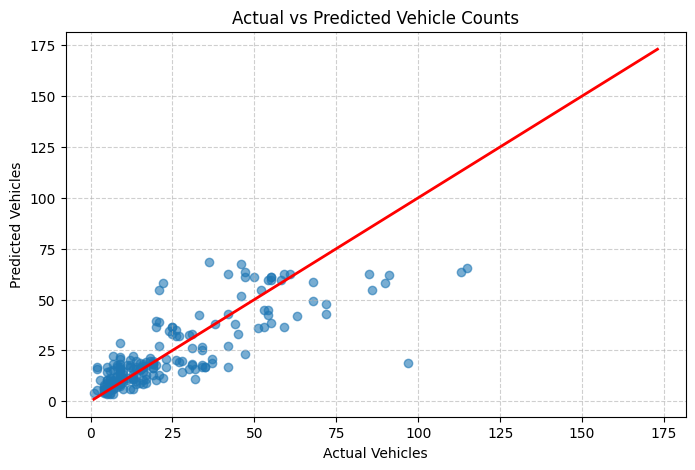

In [23]:
plt.figure(figsize=(8,5))
plt.scatter(y_test[:200], y_pred[:200], alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2)
plt.title("Actual vs Predicted Vehicle Counts")
plt.xlabel("Actual Vehicles")
plt.ylabel("Predicted Vehicles")
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()